# Worksheet: Dimension Reduction


Since we miss one lecture last Wednesday, I do not have time to cover dimension reduction. Please look at this worksheet and asnwer the questions in this worksheet.

Feel free to discuss with your classmates or ask your TA for help.

Grading policy:
1. Finish reading this worksheet and answer all questions.
2. The correctness of your answers.


**Question 1: Please read this [article](https://neptune.ai/blog/dimensionality-reduction) and summarize what is the curse of dimensionality?**

Answer: When there are a lot of features for data, it can lead to difficulty in clustering features, running a risk of overfitting the model, and increasing time/space complexity. 



**Question 2: Please read the article given in Question 1 and this [article](https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d) and then summarize what is the kernel trick/method?**

Answer: It allows you to project non-linear data onto a higher dimensional space and separate different distributions of data.


Please read this [article](https://medium.com/analytics-vidhya/locally-linear-embedding-lle-data-mining-b956616d24e9) which includes an explanation for LLE. You are also recommended to read the first paper on LLE, which is available [here](https://cs.nyu.edu/~roweis/lle/papers/lleintro.pdf).

Please read the following code which contains the implementations of kernel PCA and LLE. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<Axes3D: >

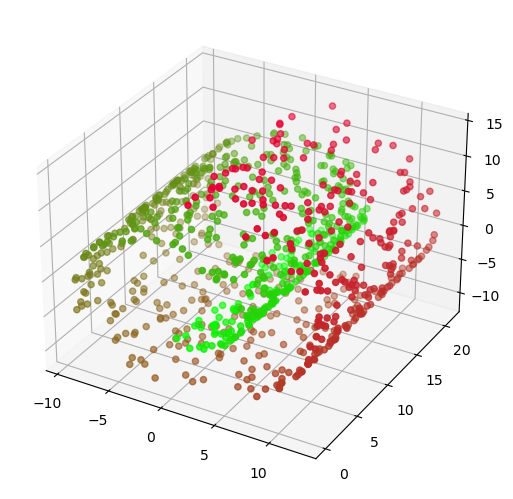

In [2]:
# Generate swiss_roll dataset

from sklearn.datasets import make_swiss_roll

X, t = make_swiss_roll(n_samples = 1000, noise = 0.0)

# visualize the datapoints
pix = (t - np.min(t)) / (np.max(t) - np.min(t)) 

color = np.column_stack((0.9*pix, 1-pix, 0.2*pix))

fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,2], c = color)

fig.add_axes(ax)

## Kernel PCA

Text(0.5, 1.0, 'Kernel PCA')

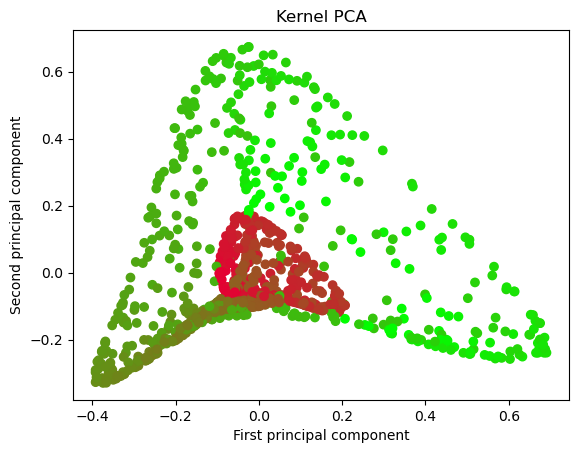

In [3]:
from sklearn.decomposition import KernelPCA

# kernel PCA

rbf_pca = KernelPCA(n_components = 2, kernel = "rbf", gamma = 0.04)

X_reduced = rbf_pca.fit_transform(X)




# visualization

plt.scatter(X_reduced[:,0], X_reduced[:,1], c = color)

plt.xlabel('First principal component')

plt.ylabel('Second principal component')

plt.title('Kernel PCA')

## LLE (locally linear embedding)

Locally Linear Embedding is another powerful nonlinear dimension reduction technique. This algorithm first measures how each training instance linearly relates to its closest neighbors, and then look for a low-dimensional representation of the training set where these local relationships are best preserved.

Text(0.5, 1.0, 'LLE')

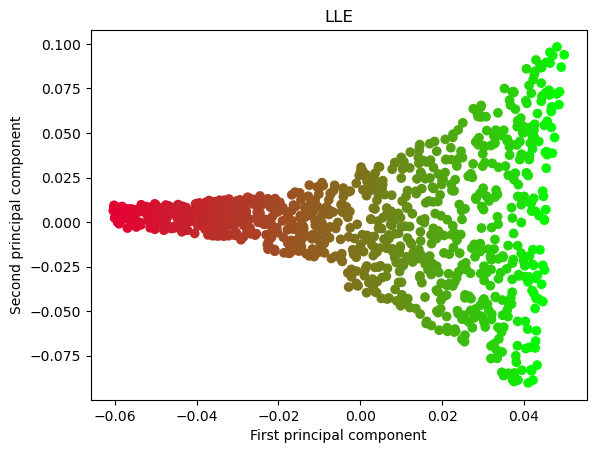

In [4]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components = 2, n_neighbors = 10)
X_reduced = lle.fit_transform(X)

plt.scatter(X_reduced[:,0], X_reduced[:,1], c = color)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('LLE')

# More on Kernel trick

If you were in my PICA16A course, you learned Support Vector Machine (SVM) where you are also able to use kernel method. 

Please read the documentation for kernel PCA, and find the kernels you can use and their corresponding parameters.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA



# More on fit_transform and transform:

Recall that we should do standardarization before implementing PCA, we can also use python command to do so. Please look at the following code:


In [5]:
from sklearn.preprocessing import StandardScaler

data1 = np.arange(12).reshape(4,3)
data2 = np.arange(15).reshape(5,3)

# fit StandardScaler and then do trasformation for given data
scalar = StandardScaler()
data1_sd =  scalar.fit_transform(data1)

# we do a transformation for given data1, then we do the same transformation for data2
data2_sd = scalar.transform(data2)

**Question 3: What does StandardScaler do?**

Answer: It scales the column to a standard or normal distribution with mean 0 and variance of 1.

**Question 4: What is the difference between `fit_transform` and `transform`?**

Answer: transform performs scaling based on a mean and standard deviation while fit_transform computes the mean / standard deviation and then applies a trasnformation.

In [6]:
data1
data1_sd

data2

# scalar

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [7]:
# Code:
    
data1 = np.arange(12).reshape(4,3)
data2 = np.arange(15).reshape(3,5)

scalar = StandardScaler()
data1_sd =  scalar.fit_transform(data1)
data2_sd = scalar.transform(data2)


ValueError: X has 5 features, but StandardScaler is expecting 3 features as input.

**Question 5: Above code raises ValueError, explain why.**

The number of features don't match.